# 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/content/disabled_person_wearable.xlsx')

In [3]:
# 코랩 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터파악

In [5]:
data.head()

,번호,관할지사,성별,장애유형,중분류,기기 이용 장애인 종사 산업분류
0,1,경기지역본부,여성,지체장애,차량용 액세서리 및 개조용품,종합병원
1,2,서울지역본부,남성,뇌병변장애,작업용 가구 및 비품,기타 일반 공공 행정
2,3,서울지역본부,남성,뇌병변장애,작업용 가구 및 비품,기타 일반 공공 행정
3,4,서울지역본부,남성,뇌병변장애,의자용 액세서리,기타 일반 공공 행정
4,5,대전지역본부,남성,지체장애,동력 구동 이동기기,금속 단조제품 제조업


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   번호                 11311 non-null  int64 
 1   관할지사               11311 non-null  object
 2   성별                 11311 non-null  object
 3   장애유형               11311 non-null  object
 4   중분류                11310 non-null  object
 5   기기 이용 장애인 종사 산업분류  9521 non-null   object
dtypes: int64(1), object(5)
memory usage: 530.3+ KB


# 데이터 주제 선정
1. 데이터 안에 있는 장애유형에서 시각장애인만 활용

## 컬럼 확인

In [7]:
data.columns


Index(['번호', '관할지사', '성별', '장애유형', '중분류', '기기 이용 장애인 종사 산업분류'], dtype='object')

## 필요한 컬럼만 선택

In [8]:
data = data[['번호', '장애유형', '중분류']]

## 시각장애 데이터 필터링

In [9]:
eye_sick_data = data[data['장애유형'] == '시각장애'].copy()

## 필터링 결과 확인

In [14]:
# 결과 확인
print(eye_sick_data.head())
print(eye_sick_data.info())

    번호  장애유형                     중분류
5    6  시각장애               시각 보조공학기기
6    7  시각장애      읽기, 쓰기, 그리기 보조공학기기
9   10  시각장애      읽기, 쓰기, 그리기 보조공학기기
10  11  시각장애       방향 및 위치인식용 보조공학기기
11  12  시각장애  시간, 기억 및 일정 관리용 보조공학기기
<class 'pandas.core.frame.DataFrame'>
Index: 2628 entries, 5 to 11310
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      2628 non-null   int64 
 1   장애유형    2628 non-null   object
 2   중분류     2627 non-null   object
dtypes: int64(1), object(2)
memory usage: 82.1+ KB
None


## 난값 제거

In [19]:
eye_sick_data['중분류'].unique()

array(['시각 보조공학기기', '읽기, 쓰기, 그리기 보조공학기기', '방향 및 위치인식용 보조공학기기',
       '시간, 기억 및 일정 관리용 보조공학기기', '건강보호 및 안전용 보조공학기기', '작동 및 원격제어용 보조공학기기',
       '출력 장치', '작업용 가구 및 비품', '탁상형 점자출력기', '전자입력보조기기', '데이지플레이어',
       '기타신체보조기기', nan, '행정, 자료 저장 및 관리용 보조공학기기', '의자용 액세서리',
       '위치잡기용(positioning) 보조공학기기', '청각 및 시각 정보의 기록, 재생, 표시용 보조공학기기',
       '청각  보조공학기기', '대형모니터', '스크린리더단말기', '휴대용점자출력기', '터치모니터', '휴대용 확대기',
       '점자정보단말기', '특수시계', '탁상형 확대기', '기타정보접근기기', '차량용 액세서리 및 개조용품',
       '신호기기', '원거리 통신용 보조공학기기', '동력 구동 이동기기', '작업장 사물 운반용 보조공학기기'],
      dtype=object)

In [26]:
# prompt: 난값 존재하는지 확인하는 코드좀

eye_sick_data.isnull().sum()

,0
번호,0
장애유형,0
중분류,1


In [27]:
# non값 제거
eye_sick_data.dropna(subset=['중분류'], inplace=True)

In [28]:
eye_sick_data.isnull().sum()

,0
번호,0
장애유형,0
중분류,0


In [36]:
eye_sick_data['중분류'].unique()

array(['시각 보조공학기기', '읽기, 쓰기, 그리기 보조공학기기', '방향 및 위치인식용 보조공학기기',
       '시간, 기억 및 일정 관리용 보조공학기기', '건강보호 및 안전용 보조공학기기', '작동 및 원격제어용 보조공학기기',
       '출력 장치', '작업용 가구 및 비품', '탁상형 점자출력기', '전자입력보조기기', '데이지플레이어',
       '기타신체보조기기', '행정, 자료 저장 및 관리용 보조공학기기', '의자용 액세서리',
       '위치잡기용(positioning) 보조공학기기', '청각 및 시각 정보의 기록, 재생, 표시용 보조공학기기',
       '청각  보조공학기기', '대형모니터', '스크린리더단말기', '휴대용점자출력기', '터치모니터', '휴대용 확대기',
       '점자정보단말기', '특수시계', '탁상형 확대기', '기타정보접근기기', '차량용 액세서리 및 개조용품',
       '신호기기', '원거리 통신용 보조공학기기', '동력 구동 이동기기', '작업장 사물 운반용 보조공학기기'],
      dtype=object)

## 피벗테이블 활용

In [37]:
pivot_table_data = eye_sick_data.pivot_table(
    index='장애유형',
    columns='중분류',
    aggfunc='size',
    fill_value=0
)

pivot_table_data

중분류,건강보호 및 안전용 보조공학기기,기타신체보조기기,기타정보접근기기,대형모니터,데이지플레이어,동력 구동 이동기기,방향 및 위치인식용 보조공학기기,스크린리더단말기,시각 보조공학기기,"시간, 기억 및 일정 관리용 보조공학기기",...,청각 보조공학기기,"청각 및 시각 정보의 기록, 재생, 표시용 보조공학기기",출력 장치,탁상형 점자출력기,탁상형 확대기,터치모니터,특수시계,"행정, 자료 저장 및 관리용 보조공학기기",휴대용 확대기,휴대용점자출력기
장애유형,,,,,,,,,,,,,,,,,,,,,
시각장애,276,13,1,4,5,1,122,8,194,90,...,2,1,222,4,4,2,1,23,2,2


## 여기서 top10 정한 뒤 이름 변경 하자 이름 너무 길어서..

In [52]:
# 중분류 별 개수 계산
category_counts = eye_sick_data['중분류'].value_counts()

# 상위 10개 필터링
top_10_categories = category_counts.head(10)
top_10_categories

,count
중분류,
"읽기, 쓰기, 그리기 보조공학기기",1081
작동 및 원격제어용 보조공학기기,364
건강보호 및 안전용 보조공학기기,276
출력 장치,222
시각 보조공학기기,194
작업용 가구 및 비품,185
방향 및 위치인식용 보조공학기기,122
"시간, 기억 및 일정 관리용 보조공학기기",90
"행정, 자료 저장 및 관리용 보조공학기기",23


## 이름 수정

In [53]:
name_mapping = {
    '읽기, 쓰기, 그리기 보조공학기기' : '학습보조기기',
    '작동 및 원격제어용 보조공학기기' : '제어보조기기',
    '건강보호 및 안전용 보조공학기기' : '건강보조기기',
    '출력 장치' : '출력장치기기',
    '시각 보조공학기기' : '시각보조기기',
    '작업용 가구 및 비품' : '작업용가구',
    '방향 및 위치인식용 보조공학기기' : '방향보조기기',
    '시간, 기억 및 일정 관리용 보조공학기기' : '일정관리기기',
    '행정, 자료 저장 및 관리용 보조공학기기' : '자료관리기기',
    '기타신체보조기기' : '기타보조기기'
}
top_10_categories.index = top_10_categories.index.map(name_mapping)
top_10_categories

,count
중분류,
학습보조기기,1081
제어보조기기,364
건강보조기기,276
출력장치기기,222
시각보조기기,194
작업용가구,185
방향보조기기,122
일정관리기기,90
자료관리기기,23


## 표만들기

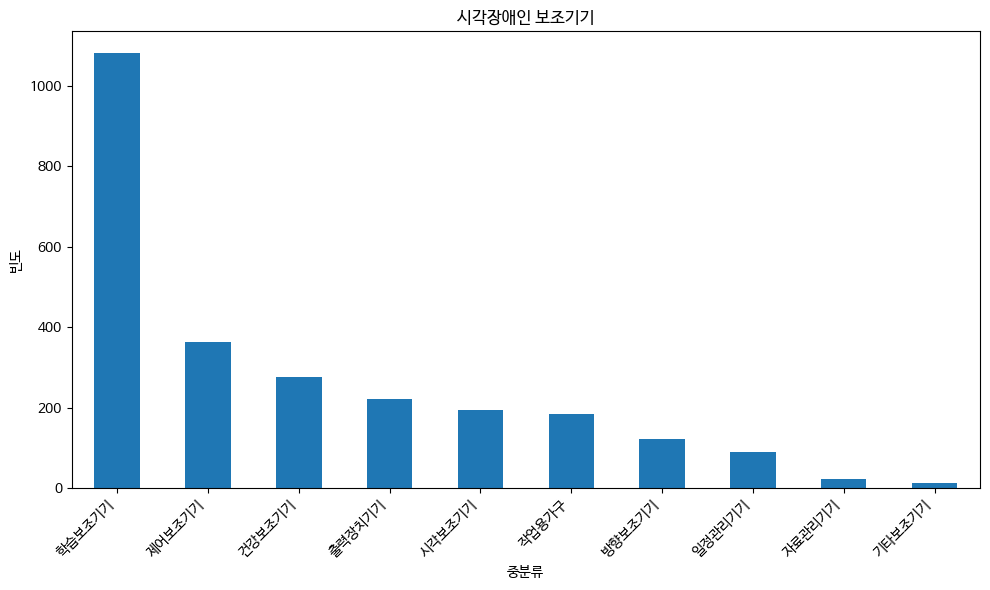

In [55]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.title('시각장애인 보조기기')
plt.xlabel('중분류')
plt.ylabel('빈도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()